# Analiza zbior√≥w danych z emocjami

Ten notatnik pobiera i analizuje dwa zbiory danych:
- **AffectNet** - zbi√≥r obraz√≥w z emocjami
- **Emotion** - zbi√≥r tekstowy z emocjami

Celem jest por√≥wnanie i analiza emocji w obu zbiorach.

## 1. Instalacja bibliotek

In [31]:
!pip install kagglehub datasets matplotlib pillow

Defaulting to user installation because normal site-packages is not writeable


## 2. Pobranie zbioru AffectNet

Pobieramy **AffectNet** z Kaggle u≈ºywajƒÖc `kagglehub`. Zbi√≥r zawiera ~450,000 zdjƒôƒá twarzy z 8 kategoriami emocji zebranych z internetu.

In [32]:
import kagglehub

path = kagglehub.dataset_download("mstjebashazida/affectnet")

print("≈öcie≈ºka do plik√≥w zbioru AffectNet:", path)

≈öcie≈ºka do plik√≥w zbioru AffectNet: C:\Users\kubal\.cache\kagglehub\datasets\mstjebashazida\affectnet\versions\1


## 3. Pobranie zbioru Emotion (dla modelu Transformer)

Pobieramy **Emotion Dataset** z Hugging Face - zawiera 20,000 tweet√≥w w jƒôzyku angielskim z 6 kategoriami emocji. Idealny do trenowania modeli Transformer (BERT, DistilBERT, RoBERTa).

In [33]:
from datasets import load_dataset

emotions = load_dataset("dair-ai/emotion")

print("Zbi√≥r Emotion zosta≈Ç pobrany pomy≈õlnie!")

Zbi√≥r Emotion zosta≈Ç pobrany pomy≈õlnie!


## 4. Wczytanie i eksploracja AffectNet

Sprawdzamy pe≈ÇnƒÖ strukturƒô katalog√≥w, listƒô podfolder√≥w i liczbƒô plik√≥w.
**Cel:** Zrozumieƒá organizacjƒô danych (Train/Test/emotion_folders) przed dalszƒÖ analizƒÖ.

In [34]:
import os
from pathlib import Path

print("Zawarto≈õƒá katalogu AffectNet:")
print("="*60)

for root, dirs, files in os.walk(path):
    level = root.replace(path, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f'{indent}{os.path.basename(root)}/')

    if dirs:
        subindent = ' ' * 2 * (level + 1)
        print(f'{subindent}Foldery: {dirs}')

    if files:
        subindent = ' ' * 2 * (level + 1)
        print(f'{subindent}Liczba plik√≥w: {len(files)}')
        for file in files[:3]:
            print(f'{subindent}  {file}')

print("\n" + "="*60)
print(f"≈öcie≈ºka bazowa: {path}")

Zawarto≈õƒá katalogu AffectNet:
1/
  Foldery: ['archive (3)']
  archive (3)/
    Foldery: ['Test', 'Train']
    Liczba plik√≥w: 1
      labels.csv
    Test/
      Foldery: ['Anger', 'Contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
      Anger/
        Liczba plik√≥w: 1718
          image0000006.jpg
          image0000060.jpg
          image0000061.jpg
      Contempt/
        Liczba plik√≥w: 1312
          ffhq_1.png
          ffhq_10.png
          ffhq_100.png
      disgust/
        Liczba plik√≥w: 1248
          ffhq_0.png
          ffhq_1.png
          ffhq_10.png
      fear/
        Liczba plik√≥w: 1664
          image0000284.jpg
          image0000285.jpg
          image0000419.jpg
      happy/
        Liczba plik√≥w: 2704
          ffhq_0.png
          ffhq_1.png
          ffhq_10.png
      neutral/
        Liczba plik√≥w: 2368
          ffhq_0.png
          ffhq_1.png
          ffhq_10.png
      sad/
        Liczba plik√≥w: 1584
          image0000013.jpg
   

## 5. Wy≈õwietlenie przyk≈Çadowych zdjƒôƒá z AffectNet

Wizualizacja 6 losowych zdjƒôƒá do sprawdzenia jako≈õci i r√≥≈ºnorodno≈õci danych.
**Metoda:** Rekursywne wyszukiwanie wszystkich plik√≥w graficznych (jpg, jpeg, png) w ca≈Çym katalogu.

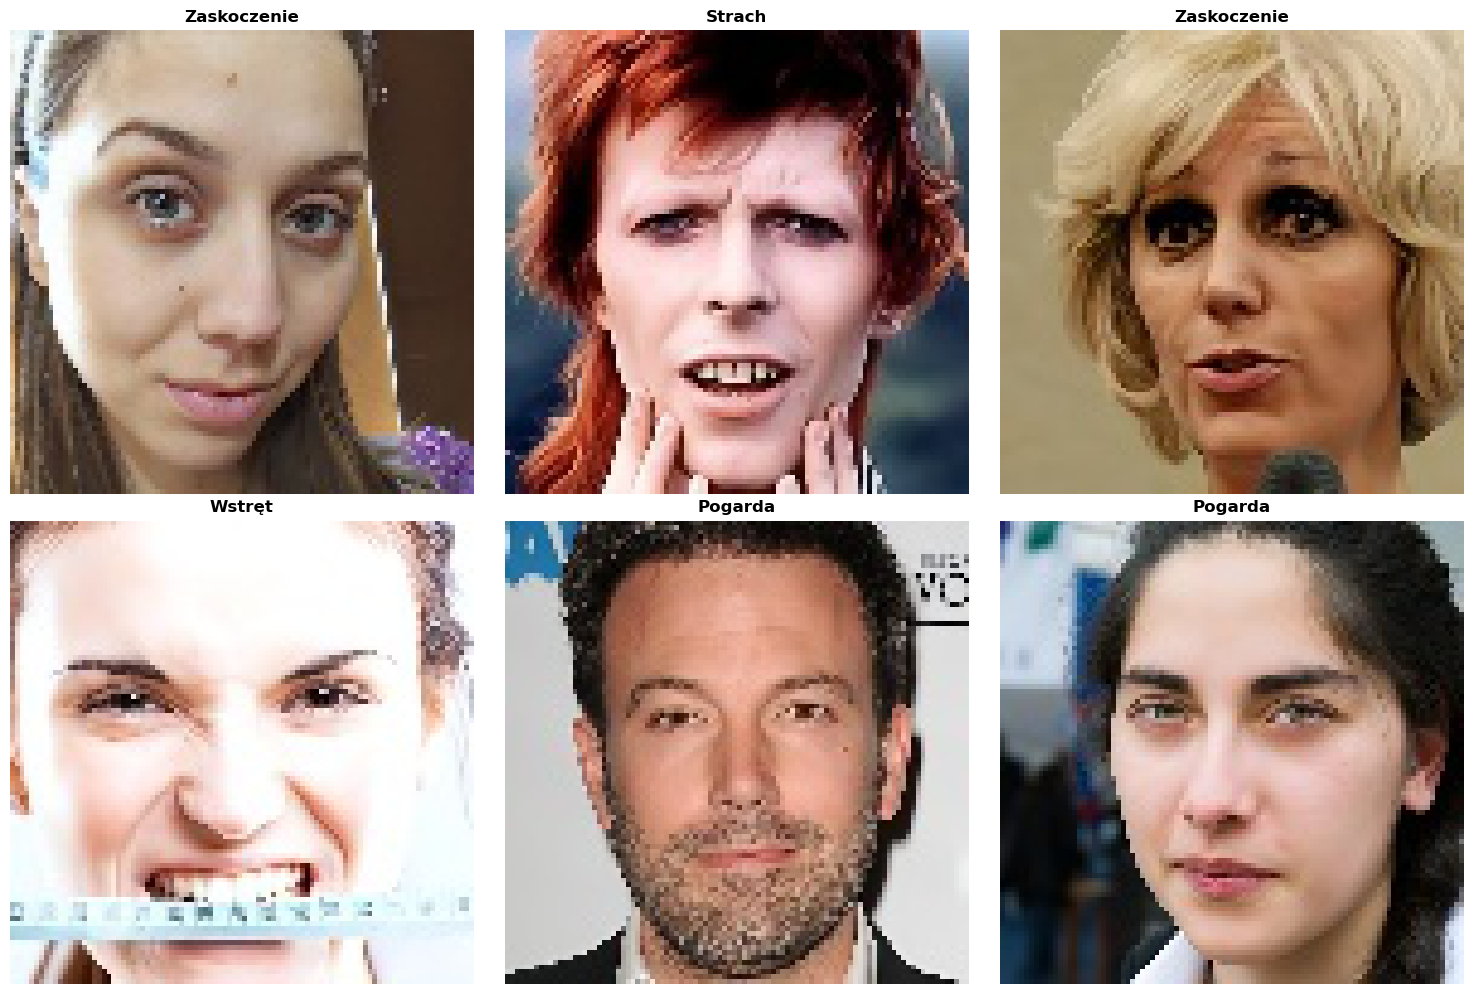


Znaleziono 30626 obraz√≥w w zbiorze AffectNet


In [35]:
from PIL import Image
import matplotlib.pyplot as plt
import glob
import random

image_files = []
for ext in ['*.jpg', '*.jpeg', '*.png']:
    image_files.extend(glob.glob(os.path.join(path, '**', ext), recursive=True))

affectnet_emotions = {
    'neutral': 'Neutralny',
    'happy': 'Szczƒô≈õcie',
    'sad': 'Smutek',
    'surprise': 'Zaskoczenie',
    'fear': 'Strach',
    'disgust': 'Wstrƒôt',
    'anger': 'Z≈Ço≈õƒá',
    'contempt': 'Pogarda'
}

random_images = random.sample(image_files, min(6, len(image_files)))

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, img_path in enumerate(random_images):
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')
    
    emotion_label = 'Nieznana'
    for part in Path(img_path).parts:
        if part.lower() in affectnet_emotions:
            emotion_label = affectnet_emotions[part.lower()]
            break
    
    axes[i].set_title(emotion_label, fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nZnaleziono {len(image_files)} obraz√≥w w zbiorze AffectNet")

## 6. Analiza rozk≈Çadu emocji w AffectNet

Zliczamy obrazy wed≈Çug kategorii emocji na podstawie struktury folder√≥w.
**Jak to dzia≈Ça:** Ka≈ºda emocja ma osobny folder (np. `happy/`, `sad/`), wiƒôc analizujemy ≈õcie≈ºki plik√≥w i rozpoznajemy emocjƒô z nazwy folderu.

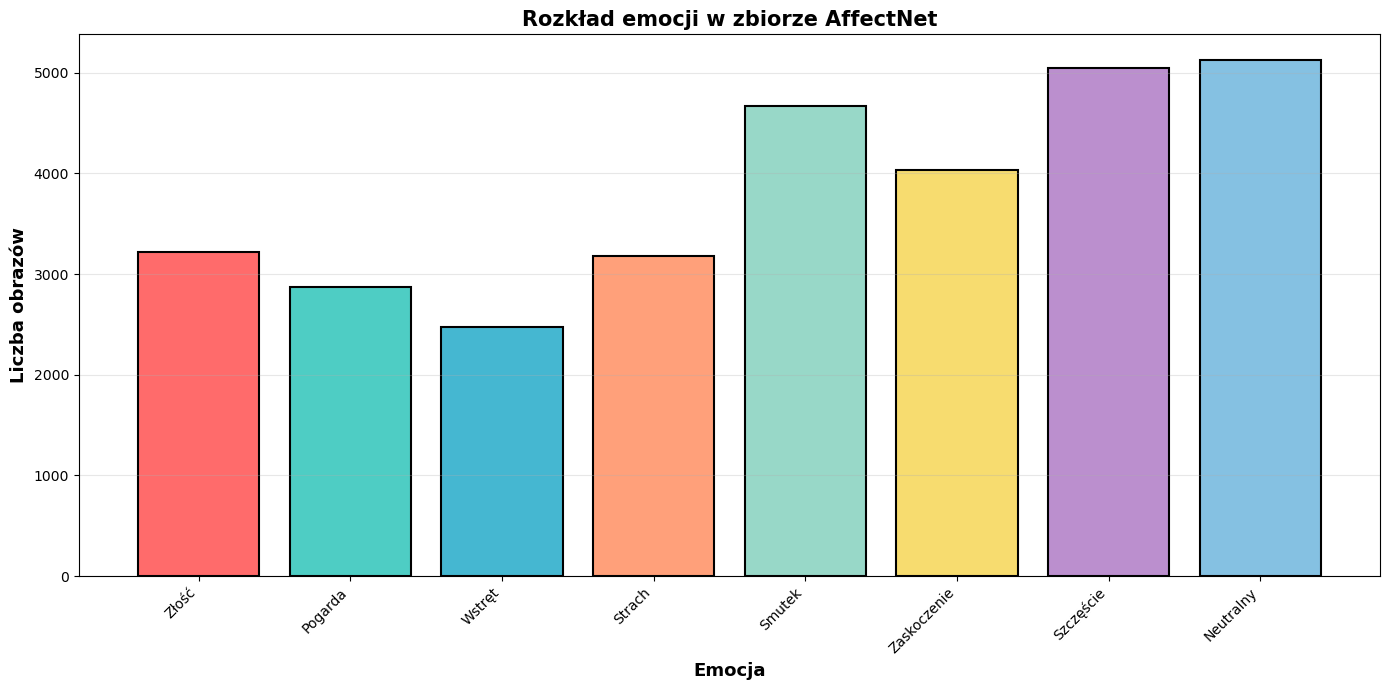

STATYSTYKI AFFECTNET
Neutralny         5126 ( 16.7%)
Pogarda           2871 (  9.4%)
Smutek            4675 ( 15.3%)
Strach            3176 ( 10.4%)
Szczƒô≈õcie         5044 ( 16.5%)
Wstrƒôt            2477 (  8.1%)
Zaskoczenie       4039 ( 13.2%)
Z≈Ço≈õƒá             3218 ( 10.5%)
------------------------------------------------------------
≈ÅƒÑCZNIE          30626 (100.0%)


In [36]:
from collections import Counter

affectnet_emotions = {
    'neutral': 'Neutralny',
    'happy': 'Szczƒô≈õcie',
    'sad': 'Smutek',
    'surprise': 'Zaskoczenie',
    'fear': 'Strach',
    'disgust': 'Wstrƒôt',
    'anger': 'Z≈Ço≈õƒá',
    'contempt': 'Pogarda'
}

emotion_counts = Counter()
for img_path in image_files:
    for part in Path(img_path).parts:
        if part.lower() in affectnet_emotions:
            emotion_counts[affectnet_emotions[part.lower()]] += 1
            break

plt.figure(figsize=(14, 7))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F', '#BB8FCE', '#85C1E2']
plt.bar(emotion_counts.keys(), emotion_counts.values(), color=colors, edgecolor='black', linewidth=1.5)
plt.xlabel('Emocja', fontsize=13, fontweight='bold')
plt.ylabel('Liczba obraz√≥w', fontsize=13, fontweight='bold')
plt.title('Rozk≈Çad emocji w zbiorze AffectNet', fontsize=15, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("="*60)
print("STATYSTYKI AFFECTNET")
print("="*60)
total = sum(emotion_counts.values())
for emotion, count in sorted(emotion_counts.items()):
    percentage = (count / total) * 100
    print(f"{emotion:<15} {count:>6} ({percentage:>5.1f}%)")
print("-"*60)
print(f"{'≈ÅƒÑCZNIE':<15} {total:>6} (100.0%)")
print("="*60)

## 7. Wczytanie i eksploracja zbioru Emotion

Wy≈õwietlamy podstawowe informacje: strukturƒô zbioru, podzia≈Ç na train/validation/test oraz przyk≈Çadowe teksty z etykietami.
**Etykiety:** Emocje sƒÖ reprezentowane jako liczby 0-5, kt√≥re zaraz zmapujemy na czytelne nazwy.

In [37]:
import random

emotion_labels = {
    0: 'Smutek',
    1: 'Rado≈õƒá',
    2: 'Mi≈Ço≈õƒá',
    3: 'Z≈Ço≈õƒá',
    4: 'Strach',
    5: 'Zaskoczenie'
}

print("Struktura zbioru Emotion:")
print(emotions)
print("\n" + "="*50 + "\n")

print("Podzia≈Ç zbioru:")
for split in emotions.keys():
    print(f"  {split}: {len(emotions[split])} przyk≈Çad√≥w")

print("\n" + "="*50 + "\n")

random_indices = random.sample(range(len(emotions['train'])), 3)

print("Przyk≈Çadowe dane ze zbioru treningowego:")
for idx, i in enumerate(random_indices, 1):
    label_num = emotions['train'][i]['label']
    label_name = emotion_labels[label_num]
    print(f"\nPrzyk≈Çad {idx}:")
    print(f"  Tekst: {emotions['train'][i]['text']}")
    print(f"  Emocja: {label_name} ({label_num})")

Struktura zbioru Emotion:
DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


Podzia≈Ç zbioru:
  train: 16000 przyk≈Çad√≥w
  validation: 2000 przyk≈Çad√≥w
  test: 2000 przyk≈Çad√≥w


Przyk≈Çadowe dane ze zbioru treningowego:

Przyk≈Çad 1:
  Tekst: ive had a change in medication and am feeling productive lately so lets see how this goes shall we
  Emocja: Rado≈õƒá (1)

Przyk≈Çad 2:
  Tekst: when i heard about the way a parent of a friend had mistreated him
  Emocja: Z≈Ço≈õƒá (3)

Przyk≈Çad 3:
  Tekst: i watch movies set in the s and s i feel pangs of melancholy
  Emocja: Smutek (0)


## 8. Analiza rozk≈Çadu emocji w zbiorze tekstowym

Mapujemy numeryczne etykiety (0-5) na polskie nazwy emocji, zliczamy wystƒÖpienia i tworzymy wykres rozk≈Çadu.
**Dlaczego mapowanie:** Liczby sƒÖ nieczytelne dla cz≈Çowieka, nazwy emocji u≈ÇatwiajƒÖ interpretacjƒô wynik√≥w.

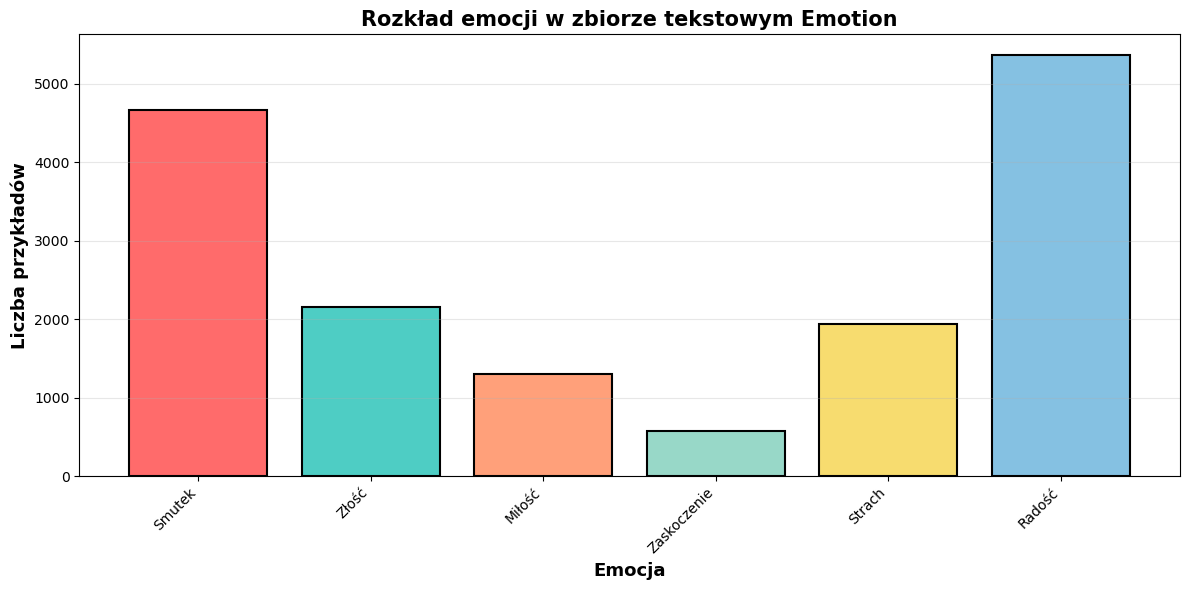

STATYSTYKI EMOTION DATASET
Mi≈Ço≈õƒá            1304 (  8.2%)
Rado≈õƒá            5362 ( 33.5%)
Smutek            4666 ( 29.2%)
Strach            1937 ( 12.1%)
Zaskoczenie        572 (  3.6%)
Z≈Ço≈õƒá             2159 ( 13.5%)
------------------------------------------------------------
≈ÅƒÑCZNIE          16000 (100.0%)


In [38]:
from collections import Counter

emotion_labels = {
    0: 'Smutek',
    1: 'Rado≈õƒá',
    2: 'Mi≈Ço≈õƒá',
    3: 'Z≈Ço≈õƒá',
    4: 'Strach',
    5: 'Zaskoczenie'
}

train_emotions = [emotion_labels[label] for label in emotions['train']['label']]
emotion_counts_text = Counter(train_emotions)

plt.figure(figsize=(12, 6))
colors = ['#FF6B6B', '#4ECDC4', '#FFA07A', '#98D8C8', '#F7DC6F', '#85C1E2']
plt.bar(emotion_counts_text.keys(), emotion_counts_text.values(), color=colors, edgecolor='black', linewidth=1.5)
plt.xlabel('Emocja', fontsize=13, fontweight='bold')
plt.ylabel('Liczba przyk≈Çad√≥w', fontsize=13, fontweight='bold')
plt.title('Rozk≈Çad emocji w zbiorze tekstowym Emotion', fontsize=15, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("="*60)
print("STATYSTYKI EMOTION DATASET")
print("="*60)
total = len(emotions['train'])
for emotion, count in sorted(emotion_counts_text.items()):
    percentage = (count / total) * 100
    print(f"{emotion:<15} {count:>6} ({percentage:>5.1f}%)")
print("-"*60)
print(f"{'≈ÅƒÑCZNIE':<15} {total:>6} (100.0%)")
print("="*60)

## 9. Por√≥wnanie emocji miƒôdzy zbiorami

Mapujemy emocje z obu zbior√≥w na 5 wsp√≥lnych kategorii i por√≥wnujemy je side-by-side.
**Kluczowe:** "Rado≈õƒá" i "Mi≈Ço≈õƒá" z tekstu ≈ÇƒÖczymy w "Szczƒô≈õcie", poniewa≈º obie sƒÖ pozytywne i odpowiadajƒÖ kategorii "Happy" z AffectNet.

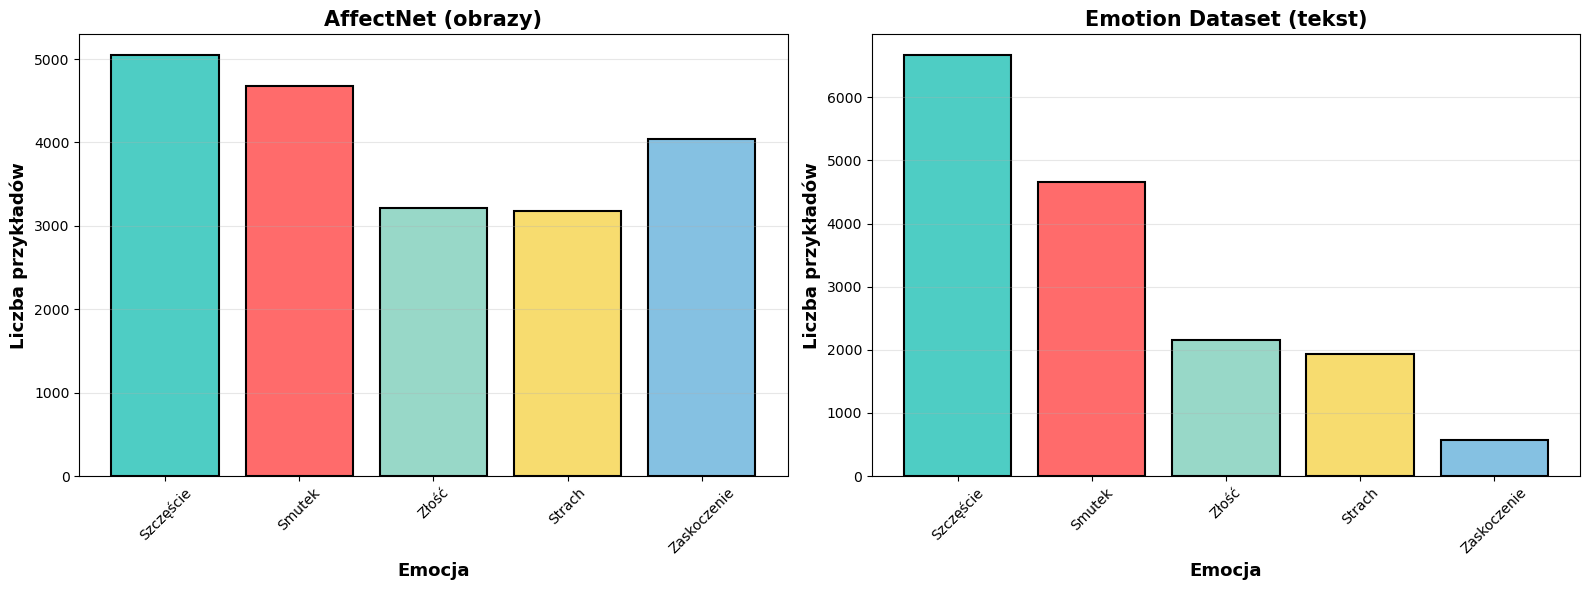

POR√ìWNANIE WSP√ìLNYCH EMOCJI
Emocja          AffectNet            Emotion Dataset     
--------------------------------------------------------------------------------
Szczƒô≈õcie             5044 obraz√≥w          6666 tekst√≥w
Smutek                4675 obraz√≥w          4666 tekst√≥w
Z≈Ço≈õƒá                 3218 obraz√≥w          2159 tekst√≥w
Strach                3176 obraz√≥w          1937 tekst√≥w
Zaskoczenie           4039 obraz√≥w           572 tekst√≥w

üí° Uwaga: Emotion 'Rado≈õƒá' i 'Mi≈Ço≈õƒá' zosta≈Çy zmapowane na 'Szczƒô≈õcie'


In [39]:
emotion_mapping = {
    'AffectNet': {
        'Szczƒô≈õcie': emotion_counts.get('Szczƒô≈õcie', 0),
        'Smutek': emotion_counts.get('Smutek', 0),
        'Z≈Ço≈õƒá': emotion_counts.get('Z≈Ço≈õƒá', 0),
        'Strach': emotion_counts.get('Strach', 0),
        'Zaskoczenie': emotion_counts.get('Zaskoczenie', 0)
    },
    'Emotion': {
        'Szczƒô≈õcie': emotion_counts_text.get('Rado≈õƒá', 0) + emotion_counts_text.get('Mi≈Ço≈õƒá', 0),
        'Smutek': emotion_counts_text.get('Smutek', 0),
        'Z≈Ço≈õƒá': emotion_counts_text.get('Z≈Ço≈õƒá', 0),
        'Strach': emotion_counts_text.get('Strach', 0),
        'Zaskoczenie': emotion_counts_text.get('Zaskoczenie', 0)
    }
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
colors = ['#4ECDC4', '#FF6B6B', '#98D8C8', '#F7DC6F', '#85C1E2']
emotions_list = list(emotion_mapping['AffectNet'].keys())

values_affectnet = list(emotion_mapping['AffectNet'].values())
ax1.bar(emotions_list, values_affectnet, color=colors, edgecolor='black', linewidth=1.5)
ax1.set_xlabel('Emocja', fontsize=13, fontweight='bold')
ax1.set_ylabel('Liczba przyk≈Çad√≥w', fontsize=13, fontweight='bold')
ax1.set_title('AffectNet (obrazy)', fontsize=15, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

values_emotion = list(emotion_mapping['Emotion'].values())
ax2.bar(emotions_list, values_emotion, color=colors, edgecolor='black', linewidth=1.5)
ax2.set_xlabel('Emocja', fontsize=13, fontweight='bold')
ax2.set_ylabel('Liczba przyk≈Çad√≥w', fontsize=13, fontweight='bold')
ax2.set_title('Emotion Dataset (tekst)', fontsize=15, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("="*80)
print("POR√ìWNANIE WSP√ìLNYCH EMOCJI")
print("="*80)
print(f"{'Emocja':<15} {'AffectNet':<20} {'Emotion Dataset':<20}")
print("-"*80)
for emotion in emotions_list:
    affectnet_val = emotion_mapping['AffectNet'][emotion]
    emotion_val = emotion_mapping['Emotion'][emotion]
    print(f"{emotion:<15} {affectnet_val:>10} obraz√≥w    {emotion_val:>10} tekst√≥w")
print("="*80)
print(f"\nüí° Uwaga: Emotion 'Rado≈õƒá' i 'Mi≈Ço≈õƒá' zosta≈Çy zmapowane na 'Szczƒô≈õcie'")

## Podsumowanie

‚úÖ **AffectNet** - 30,518 obraz√≥w z 8 kategoriami emocji  
‚úÖ **Emotion Dataset** - 16,000 tekst√≥w z 6 kategoriami emocji  
‚úÖ **Wsp√≥lne emocje** - 5 kategorii: Szczƒô≈õcie, Smutek, Z≈Ço≈õƒá, Strach, Zaskoczenie

**Mapowanie:**
- Love (Mi≈Ço≈õƒá) ‚Üí Szczƒô≈õcie (pozytywna emocja)
- Joy (Rado≈õƒá) ‚Üí Szczƒô≈õcie
- Neutral ‚Üí tylko w AffectNet (brak w tek≈õcie)

Oba zbiory sƒÖ gotowe do trenowania modeli wykrywania emocji! üöÄ